In [13]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import matplotlib.pyplot as plt

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '06448330-1a8b-4782-8006-cced83a6a655',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [3]:
crypto = pd.json_normalize(data['data'])

In [4]:
crypto.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9580,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.907432e+07,1.907432e+07,NaN,1,NaN,NaN,NaN,2022-06-22T21:48:00.000Z,19941.721788,2.859776e+10,-1.4743,0.362186,-4.403194,-9.730553,-32.171571,-50.001187,-54.591335,3.803749e+11,43.1723,4.187762e+11,NaN,2022-06-22T21:48:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5768,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.212684e+08,1.212684e+08,NaN,2,NaN,NaN,NaN,2022-06-22T21:47:00.000Z,1051.635266,1.501453e+10,-5.5958,0.025810,-6.652758,-13.059456,-47.424008,-64.538726,-66.097671,1.275301e+11,14.4790,1.275301e+11,NaN,2022-06-22T21:47:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,35021,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.698103e+10,6.861062e+10,NaN,3,NaN,NaN,NaN,2022-06-22T21:47:00.000Z,0.999048,4.626131e+10,-7.9030,0.009497,-0.006646,0.009477,-0.002396,-0.117279,-0.152636,6.691723e+10,7.5947,6.854528e+10,NaN,2022-06-22T21:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,4582,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.594389e+10,5.594389e+10,NaN,4,NaN,NaN,NaN,2022-06-22T21:47:00.000Z,1.000231,4.584294e+09,-8.6535,0.021391,0.001136,-0.007732,-0.018033,0.006919,0.075218,5.595680e+10,6.3530,5.595680e+10,NaN,2022-06-22T21:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,974,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.0,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,NaN,2022-06-22T21:47:00.000Z,214.138181,1.067722e+09,-7.9207,0.345257,-2.883454,-5.139238,-34.239227,-47.267467,-48.181348,3.496383e+10,3.9671,3.535780e+10,NaN,2022-06-22T21:47:00.000Z,NaN,NaN,NaN,NaN,NaN


In [5]:
crypto.shape

(5000, 35)

In [6]:
crypto.isnull().sum()

id                                       0
name                                     0
symbol                                   0
slug                                     0
num_market_pairs                         0
date_added                               0
tags                                     0
max_supply                            1649
circulating_supply                       0
total_supply                             0
platform                              5000
cmc_rank                                 0
self_reported_circulating_supply      3139
self_reported_market_cap              3139
tvl_ratio                             4897
last_updated                             0
quote.USD.price                          0
quote.USD.volume_24h                     0
quote.USD.volume_change_24h              0
quote.USD.percent_change_1h              0
quote.USD.percent_change_24h             0
quote.USD.percent_change_7d              0
quote.USD.percent_change_30d             0
quote.USD.p

In [7]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  5000 non-null   int64  
 1   name                                5000 non-null   object 
 2   symbol                              5000 non-null   object 
 3   slug                                5000 non-null   object 
 4   num_market_pairs                    5000 non-null   int64  
 5   date_added                          5000 non-null   object 
 6   tags                                5000 non-null   object 
 7   max_supply                          3351 non-null   float64
 8   circulating_supply                  5000 non-null   float64
 9   total_supply                        5000 non-null   float64
 10  platform                            0 non-null      float64
 11  cmc_rank                            5000 no

In [8]:
crypto.describe()

,id,num_market_pairs,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,platform.id
count,5000.000000,5000.000000,3.351000e+03,5.000000e+03,5.000000e+03,0.0,5000.000000,1.861000e+03,1.861000e+03,103.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,1.090000e+02,3976.000000
mean,9717.729000,29.223000,2.252544e+15,3.349514e+14,1.081274e+15,NaN,2500.543200,1.781131e+20,1.942980e+19,13.312934,158.139165,2.617874e+07,2.786416e+03,0.095656,18.955094,18.748971,3.665419,-24.072823,5.534017e+03,1.862417e+08,0.020023,4.338228e+12,4.440653e+08,1697.623742
std,5942.823341,541.557975,3.918851e+16,1.508405e+16,2.495018e+16,NaN,1443.577291,5.085962e+21,8.381880e+20,48.936422,4604.956706,8.050662e+08,1.565696e+05,5.133037,1411.665935,1295.159845,1355.376376,828.079400,3.923990e+05,5.850805e+09,0.663857,2.091971e+14,1.253754e+09,1274.536939
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000,-2.500000e+07,-8.214669e+06,0.000066,0.000000,0.000000e+00,-1.000000e+02,-66.825101,-99.999319,-99.999110,-100.000000,-100.000000,-1.000000e+02,0.000000e+00,0.000000,0.000000e+00,3.680385e+02,1.000000
25%,4194.500000,2.000000,1.000000e+08,0.000000e+00,1.000000e+07,NaN,1250.750000,1.214200e+07,3.990624e+05,0.116232,0.001241,1.091232e+04,-2.189820e+01,-0.296346,-5.812096,-12.143643,-45.949167,-72.300648,-7.701418e+01,0.000000e+00,0.000000,4.546772e+05,2.003214e+06,1027.000000
50%,8969.000000,5.000000,5.000000e+08,1.869672e+06,1.913465e+08,NaN,2500.500000,8.700714e+07,2.054009e+06,0.399374,0.016108,6.726931e+04,-1.279650e+00,0.019418,-2.963788,-5.330225,-31.876903,-59.618509,-6.377966e+01,1.947967e+04,0.000000,4.267843e+06,1.805495e+07,1027.000000
75%,14742.000000,11.000000,3.000000e+09,1.214135e+08,1.061532e+09,NaN,3750.250000,9.832337e+08,1.157337e+07,2.985524,0.192469,3.871851e+05,9.868350e+00,0.370996,0.000000,2.383533,-12.472305,-40.892168,-4.391398e+01,1.555314e+06,0.000000,3.672950e+07,1.288688e+08,1839.000000
max,20722.000000,35021.000000,1.000000e+18,9.818468e+17,1.000000e+18,NaN,5000.000000,1.921825e+23,3.615885e+22,348.328870,305525.089412,4.626131e+10,1.100963e+07,145.949236,99796.941702,91385.871274,93762.698419,54044.253113,2.774666e+07,3.803749e+11,43.172300,1.176134e+16,7.780269e+09,15165.000000


In [9]:
crypto.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5000.0,9.717729e+03,5.942823e+03,1.000000e+00,4.194500e+03,8.969000e+03,1.474200e+04,2.072200e+04
num_market_pairs,5000.0,2.922300e+01,5.415580e+02,1.000000e+00,2.000000e+00,5.000000e+00,1.100000e+01,3.502100e+04
max_supply,3351.0,2.252544e+15,3.918851e+16,0.000000e+00,1.000000e+08,5.000000e+08,3.000000e+09,1.000000e+18
circulating_supply,5000.0,3.349514e+14,1.508405e+16,0.000000e+00,0.000000e+00,1.869672e+06,1.214135e+08,9.818468e+17
total_supply,5000.0,1.081274e+15,2.495018e+16,0.000000e+00,1.000000e+07,1.913465e+08,1.061532e+09,1.000000e+18
platform,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cmc_rank,5000.0,2.500543e+03,1.443577e+03,1.000000e+00,1.250750e+03,2.500500e+03,3.750250e+03,5.000000e+03
self_reported_circulating_supply,1861.0,1.781131e+20,5.085962e+21,-2.500000e+07,1.214200e+07,8.700714e+07,9.832337e+08,1.921825e+23
self_reported_market_cap,1861.0,1.942980e+19,8.381880e+20,-8.214669e+06,3.990624e+05,2.054009e+06,1.157337e+07,3.615885e+22
tvl_ratio,103.0,1.331293e+01,4.893642e+01,6.595000e-05,1.162321e-01,3.993742e-01,2.985524e+00,3.483289e+02


In [10]:
crypto.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply', 'platform',
       'cmc_rank', 'self_reported_circulating_supply',
       'self_reported_market_cap', 'tvl_ratio', 'last_updated',
       'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address'],
      dtype='object')

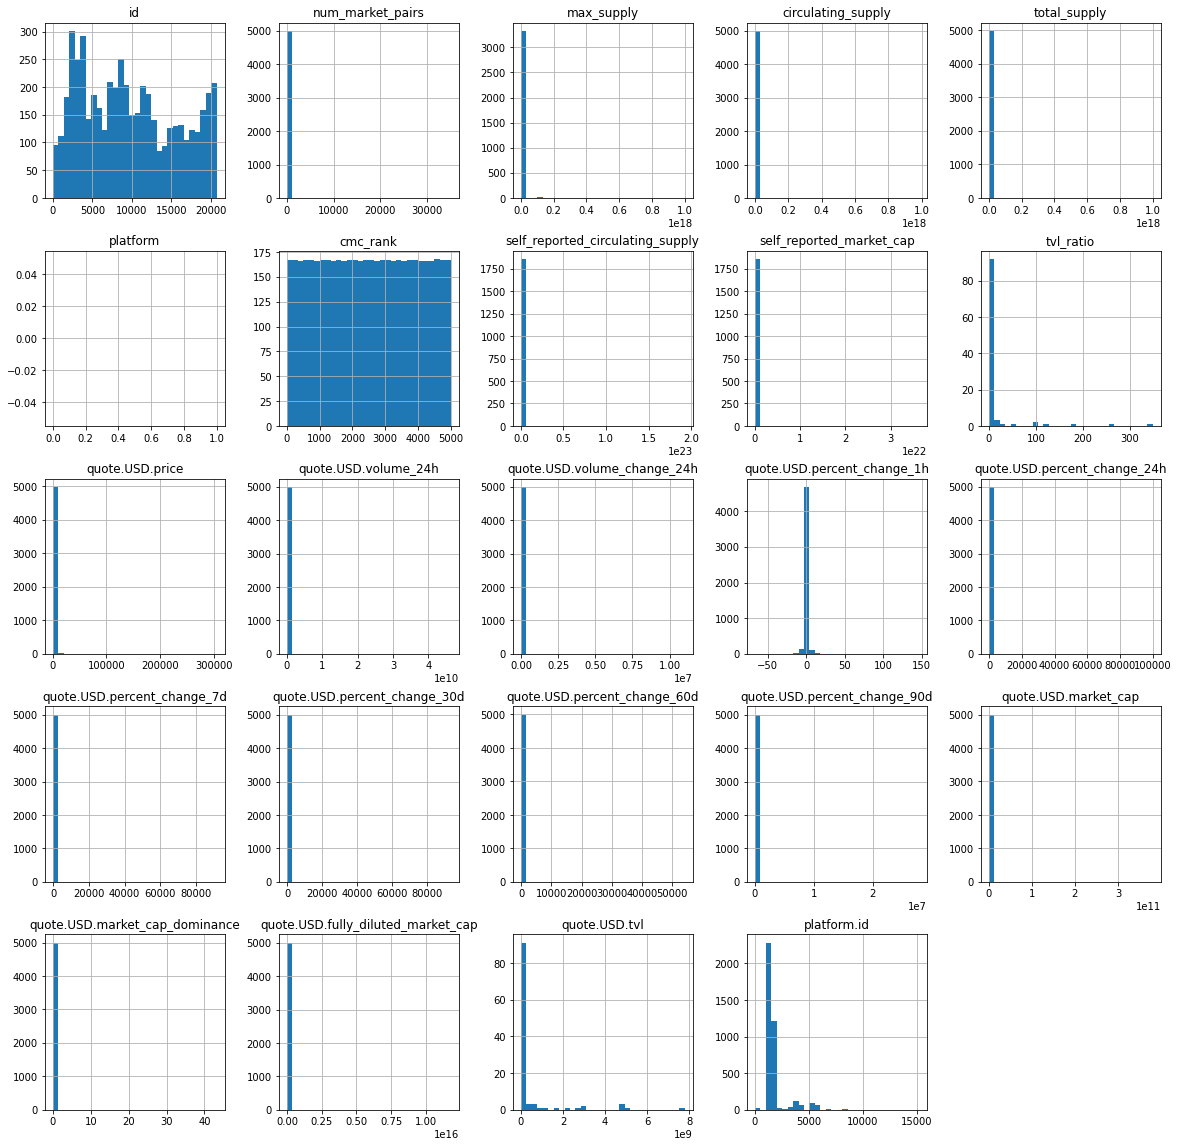

In [17]:
crypto.hist(bins=30, figsize=(20, 20))
plt.show()

In [19]:
crypto.drop(['id'], inplace = True, axis = 1)

In [20]:
crypto.head()

,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,Bitcoin,BTC,bitcoin,9580,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.907432e+07,1.907432e+07,NaN,1,NaN,NaN,NaN,2022-06-22T21:48:00.000Z,19941.721788,2.859776e+10,-1.4743,0.362186,-4.403194,-9.730553,-32.171571,-50.001187,-54.591335,3.803749e+11,43.1723,4.187762e+11,NaN,2022-06-22T21:48:00.000Z,NaN,NaN,NaN,NaN,NaN
1,Ethereum,ETH,ethereum,5768,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.212684e+08,1.212684e+08,NaN,2,NaN,NaN,NaN,2022-06-22T21:47:00.000Z,1051.635266,1.501453e+10,-5.5958,0.025810,-6.652758,-13.059456,-47.424008,-64.538726,-66.097671,1.275301e+11,14.4790,1.275301e+11,NaN,2022-06-22T21:47:00.000Z,NaN,NaN,NaN,NaN,NaN
2,Tether,USDT,tether,35021,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.698103e+10,6.861062e+10,NaN,3,NaN,NaN,NaN,2022-06-22T21:47:00.000Z,0.999048,4.626131e+10,-7.9030,0.009497,-0.006646,0.009477,-0.002396,-0.117279,-0.152636,6.691723e+10,7.5947,6.854528e+10,NaN,2022-06-22T21:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,USD Coin,USDC,usd-coin,4582,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.594389e+10,5.594389e+10,NaN,4,NaN,NaN,NaN,2022-06-22T21:47:00.000Z,1.000231,4.584294e+09,-8.6535,0.021391,0.001136,-0.007732,-0.018033,0.006919,0.075218,5.595680e+10,6.3530,5.595680e+10,NaN,2022-06-22T21:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,BNB,BNB,bnb,974,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.0,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,NaN,2022-06-22T21:47:00.000Z,214.138181,1.067722e+09,-7.9207,0.345257,-2.883454,-5.139238,-34.239227,-47.267467,-48.181348,3.496383e+10,3.9671,3.535780e+10,NaN,2022-06-22T21:47:00.000Z,NaN,NaN,NaN,NaN,NaN


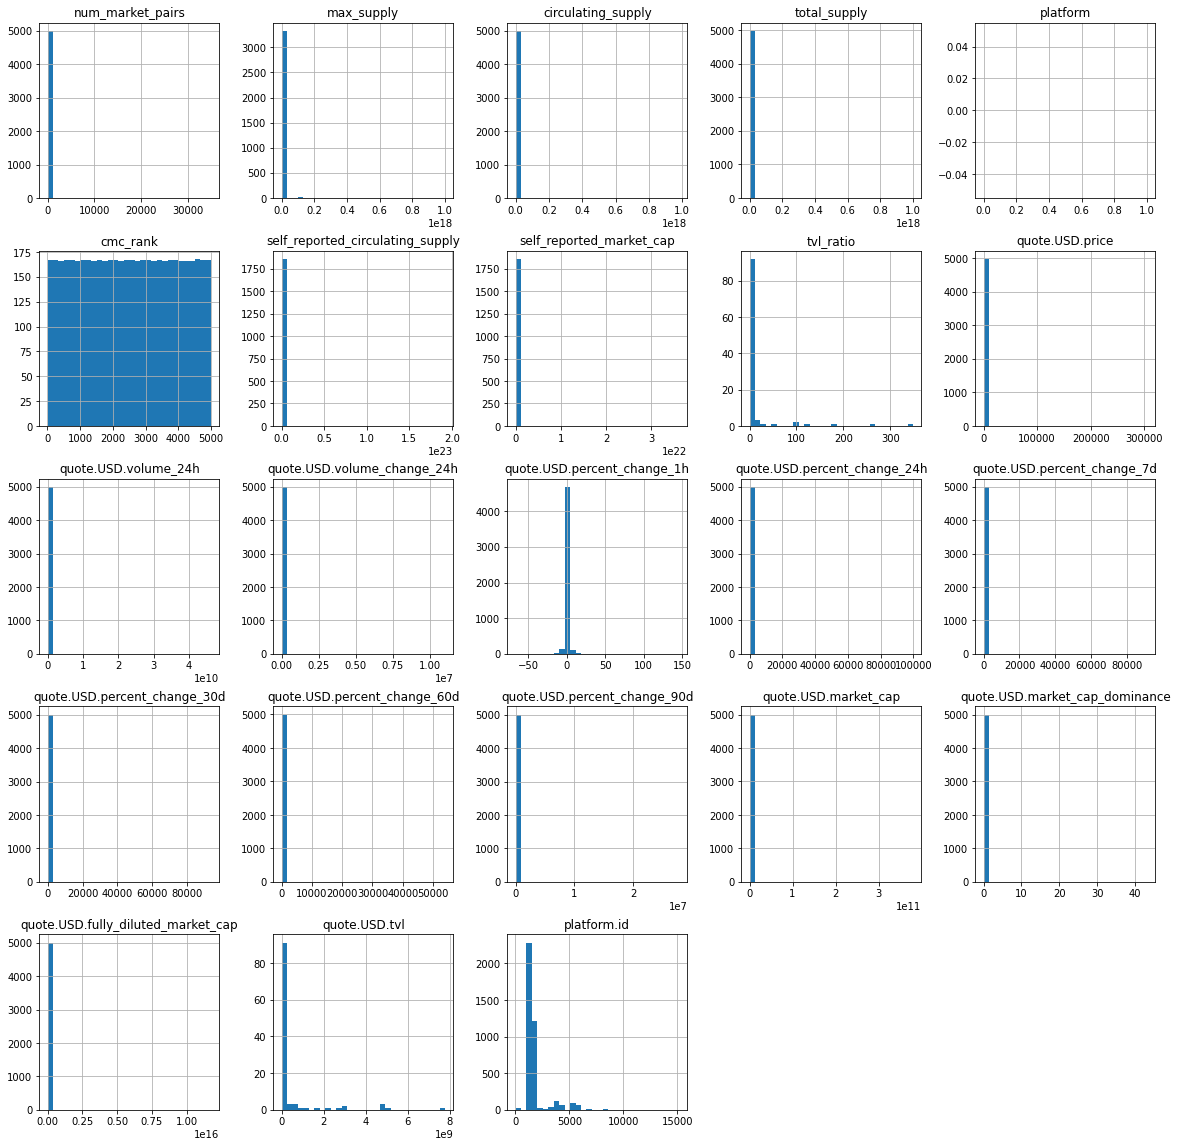

In [21]:
crypto.hist(bins=30, figsize=(20, 20))
plt.show()

<BarContainer object of 1 artists>

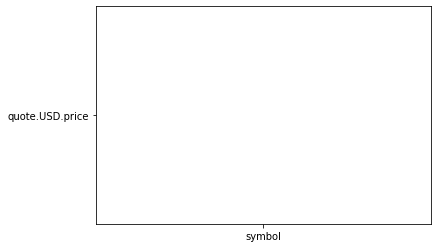

In [23]:
plt.bar('symbol', 'quote.USD.price', color ='maroon',
        width = 0.4)